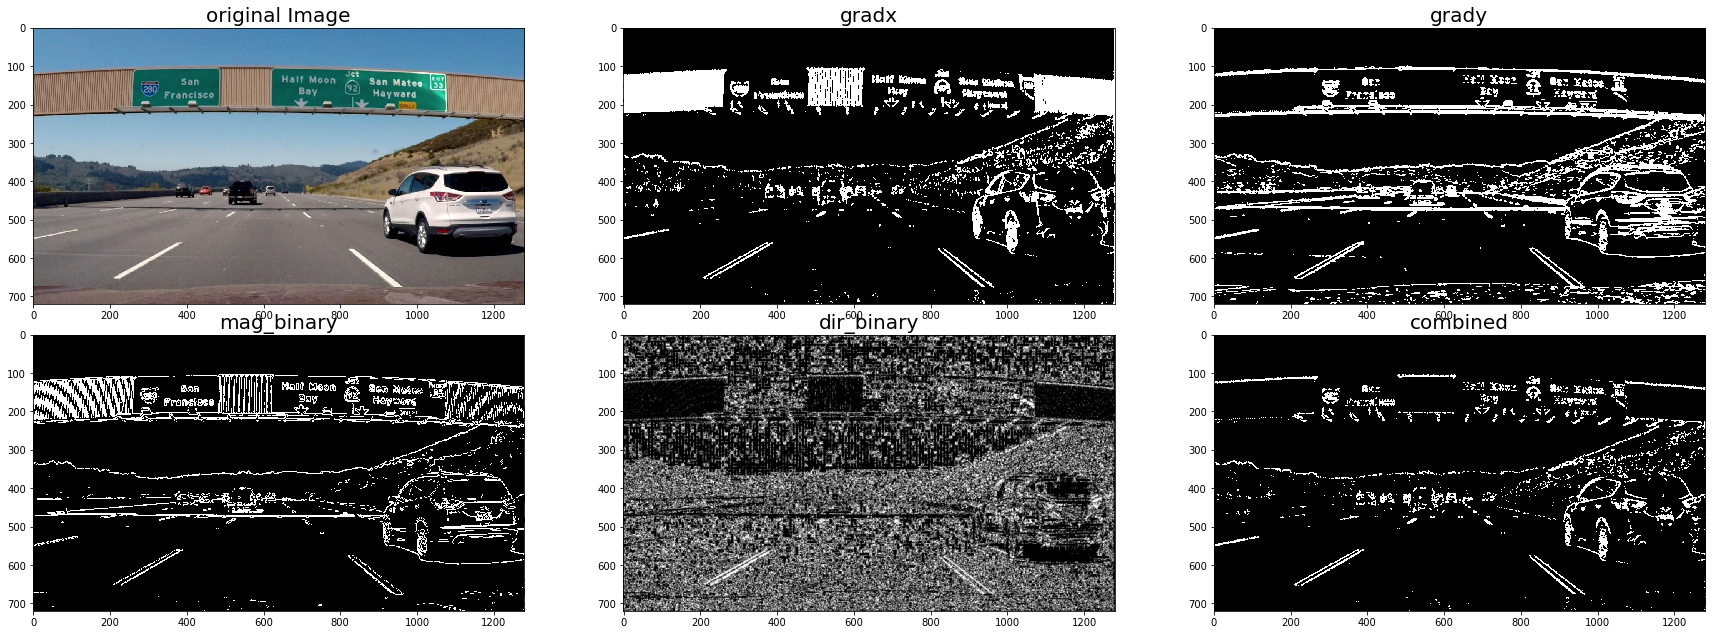

In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('signs_vehicles_xygrad.png')
def gaussian_blur(image, kernel=5):
    blurred = cv2.GaussianBlur(image, (kernel,kernel), 0)
    return blurred

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient=='x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    if orient=='y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    grad_binary = np.zeros_like(scaled_sobel)
    grad_binary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return grad_binary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    gradmag=np.sqrt(sobelx**2+sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # 5) Create a binary mask where mag thresholds are met
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
     # 6) Return this mask as your binary_output image
    return mag_binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx=np.absolute(sobelx)
    abs_sobely=np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    # 5) Create a binary mask where direction thresholds are met
    dir_binary = np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return dir_binary

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = gaussian_blur(abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 255)))
grady = gaussian_blur(abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(10, 255)))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 100))
dir_binary = gaussian_blur(dir_threshold(image, sobel_kernel=ksize, thresh= (0.7,1.3))) #(0, np.pi/2))

# Combined
combined = np.zeros_like(grady)
combined[((gradx == 1) & (grady == 1))] = 1
#combined=gaussian_blur(combined)
combined[((gradx == 1) & (grady == 1))  | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, axes = plt.subplots(2, 3, figsize=(24, 9))
f.tight_layout()
axes[0, 0].imshow(image)
axes[0, 0].set_title('original Image', fontsize=20)
axes[0, 1].imshow(gradx,cmap='gray')
axes[0, 1].set_title('gradx', fontsize=20)
axes[0, 2].imshow(grady,cmap='gray')
axes[0, 2].set_title('grady', fontsize=20)
axes[1, 0].imshow(mag_binary,cmap='gray')
axes[1, 0].set_title('mag_binary', fontsize=20)
axes[1, 1].imshow(dir_binary,cmap='gray')
axes[1, 1].set_title('dir_binary', fontsize=20)
axes[1, 2].imshow(combined,cmap='gray')
axes[1, 2].set_title('combined', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)